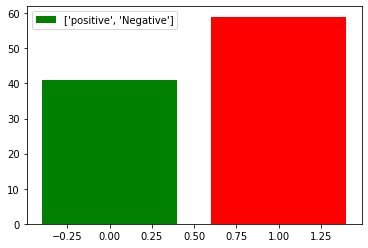

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textblob
import re



api_key='F6Hq8W2hScamTAiDbC8mkiSJY'
api_key_secret='fgQUE1yX5j1aGUkbv9v76NcqCHt6RywE6gz0px8aXeJOMQsRGR'
access_token='918824619007545345-wDZ5P7GEZMcuXCf8hS3XB2ouVjBIaVT'
access_token_secret='lgAaydyole1RrGf2ZgKzW9oRTLnF2QjWame6jH9ATYlf4'


authenticator=tweepy.OAuthHandler(api_key,api_key_secret)
authenticator.set_access_token(access_token,access_token_secret)

api=tweepy.API(authenticator,wait_on_rate_limit=True)
crypt='Dogecoin'

search=f'#{crypt} -filter:retweets'
tweet_cursor=tweepy.Cursor(api.search_tweets,q=search,lang='en',tweet_mode='extended').items(100)
tweets=[tweet.full_text for tweet in tweet_cursor]
tweets_df=pd.DataFrame(tweets,columns=['Tweets'])

for _, row in tweets_df.iterrows():
    row['Tweets']=re.sub('http\S+','',row['Tweets'])
    row['Tweets']=re.sub('#\S+','',row['Tweets'])
    row['Tweets']=re.sub('@\S+','',row['Tweets'])
    row['Tweets']=re.sub('\\n','',row['Tweets'])

tweets_df['Polarity']=tweets_df['Tweets'].map(lambda  tweet:textblob.TextBlob(tweet).sentiment.polarity)
tweets_df['Result']=tweets_df['Polarity'].map(lambda pol: '+' if pol>0 else '-')

positive=tweets_df[tweets_df.Result=='+'].count()['Tweets']
negative=tweets_df[tweets_df.Result=='-'].count()['Tweets']

plt.bar([0,1],[positive,negative],label=['positive','Negative'],color=['green','red'])
plt.legend()
plt.show()